# Higher Level Computer Vision Team Projekt

Featuring Emil Schallwig and Marmee Pandya

## Setup

In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import shutil

import torch, torchvision, torchvision.transforms.v2 as transforms
from torch.utils.data import DataLoader

## Cleaning data

In [3]:
# Defining paths

TRAIN_DATA_DIR = os.path.join("data/train")
VAL_DATA_DIR = os.path.join("data/val")

apple_train_dir = os.path.join(TRAIN_DATA_DIR, "apple")
banana_train_dir = os.path.join(TRAIN_DATA_DIR, "banana")
orange_train_dir = os.path.join(TRAIN_DATA_DIR, "orange")
avocado_train_dir = os.path.join(TRAIN_DATA_DIR, "avocado")
cherry_train_dir = os.path.join(TRAIN_DATA_DIR, "cherry")
kiwi_train_dir = os.path.join(TRAIN_DATA_DIR, "kiwi")
mango_train_dir = os.path.join(TRAIN_DATA_DIR, "mango")
pinenapple_train_dir = os.path.join(TRAIN_DATA_DIR, "pinenapple")
strawberry_train_dir = os.path.join(TRAIN_DATA_DIR, "strawberries")
watermelon_train_dir = os.path.join(TRAIN_DATA_DIR, "watermelon")

apple_val_dir = os.path.join(VAL_DATA_DIR, "apple")
banana_val_dir = os.path.join(VAL_DATA_DIR, "banana")
orange_val_dir = os.path.join(VAL_DATA_DIR, "orange")
avocado_val_dir = os.path.join(VAL_DATA_DIR, "avocado")
cherry_val_dir = os.path.join(VAL_DATA_DIR, "cherry")
kiwi_val_dir = os.path.join(VAL_DATA_DIR, "kiwi")
mango_val_dir = os.path.join(VAL_DATA_DIR, "mango")
pinenapple_val_dir = os.path.join(VAL_DATA_DIR, "pinenapple")
strawberry_val_dir = os.path.join(VAL_DATA_DIR, "strawberries")
watermelon_val_dir = os.path.join(VAL_DATA_DIR, "watermelon")


### Analysis of image sizes

(276, 183)
(225, 225)
(199, 254)
(235, 214)
(259, 194)
(225, 225)
(225, 225)
(275, 183)
(275, 183)
(221, 229)
(259, 194)
(318, 159)
(251, 201)
(239, 211)
(225, 225)
(236, 214)
(259, 195)
(270, 186)
(262, 192)
(299, 168)
(310, 163)
(300, 168)
(225, 225)
(275, 183)
(275, 183)
(225, 225)
(225, 225)
(260, 194)
(225, 225)
(271, 186)
(225, 225)
(275, 183)
(301, 167)
(285, 177)
(225, 225)
(183, 275)
(299, 168)
(300, 168)
(300, 168)
(225, 225)
(225, 225)
(240, 210)
(299, 169)
(256, 197)
(225, 225)
(261, 193)
(183, 275)
(275, 183)
(284, 177)
(225, 225)
(225, 225)
(230, 220)
(279, 181)
(251, 201)
(300, 168)
(225, 225)
(183, 275)
(266, 190)
(274, 184)
(259, 194)
(225, 225)
(299, 168)
(275, 183)
(267, 189)
(290, 174)
(247, 204)
(225, 225)
(259, 194)
(290, 174)
(266, 190)
(225, 225)
(261, 193)
(280, 180)
(276, 182)
(225, 225)
(222, 149)
(240, 210)
(275, 183)
(219, 230)
(284, 177)
(203, 248)
(225, 225)
(255, 198)
(275, 183)
(284, 177)
(225, 225)
(240, 210)
(225, 225)
(224, 224)
(265, 190)
(225, 225)

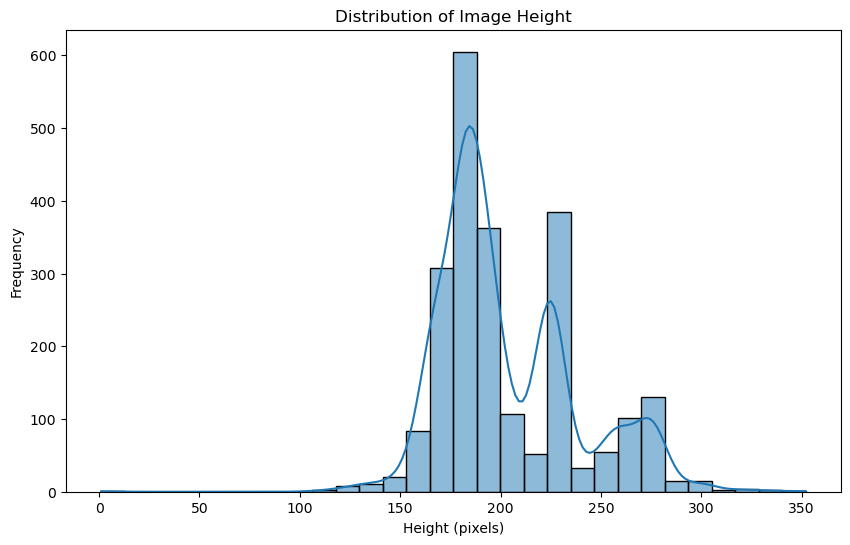

In [4]:
# Histogram of image sizes
image_sizes = []
for dirpath, dirnames, filenames in os.walk(TRAIN_DATA_DIR):
    for filename in filenames:
        if filename.endswith('.jpeg'):
            img_path = os.path.join(dirpath, filename)
            img = PIL.Image.open(img_path)
            image_sizes.append(img.size)  # (width, height)
            print(img.size)
image_sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
plt.figure(figsize=(10, 6))
sns.histplot(image_sizes_df['Height'], bins=30, kde=True)
plt.title('Distribution of Image Height')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.show()



### Cleaning dataset based on size

In [7]:
# save image paths of images size less than 124x124
small_image_paths = []
for dirpath, dirnames, filenames in os.walk(TRAIN_DATA_DIR):
    for filename in filenames:
        if filename.endswith('.jpeg'):
            img_path = os.path.join(dirpath, filename)
            img = PIL.Image.open(img_path)
            if img.size[0] < 124 or img.size[1] < 124:
                small_image_paths.append(img_path)

In [8]:
# Remove small images but save them in removed folder
removed_dir = os.path.join("removed_small_images")
os.makedirs(removed_dir, exist_ok=True)
for img_path in small_image_paths:
    img_name = os.path.basename(img_path)
    new_path = os.path.join(removed_dir, (img_path[6:10]+"train"+img_name))
    os.rename(img_path, new_path)


Repeating for validation set

In [9]:
# save image paths of images wiht size less than 124x124
small_image_paths_valid = []
for dirpath, dirnames, filenames in os.walk(VAL_DATA_DIR):
    for filename in filenames:
        if filename.endswith('.jpeg'):
            img_path = os.path.join(dirpath, filename)
            img = PIL.Image.open(img_path)
            if img.size[0] < 124 or img.size[1] < 124:
                small_image_paths_valid.append(img_path)

In [10]:
# Remove small images but save them in removed folder
removed_dir = os.path.join("removed_small_images")
os.makedirs(removed_dir, exist_ok=True)
for img_path in small_image_paths_valid:
    img_name = os.path.basename(img_path)
    new_path = os.path.join(removed_dir, (img_path[6:10]+"valid"+img_name))
    os.rename(img_path, new_path)


### Cleaning based on irritatability of object and given label

In [ ]:


def move_irritating_images(irritating_dir, irritating_notes):
    """
    Moves listed images from dataset folders into an 'irritating' folder.
    Renames them as: fruit_split_index (e.g. apple_train_00001.jpg)
    Automatically detects file extension (.jpg, .jpeg, .png).
    """

    os.makedirs(irritating_dir, exist_ok=True)

    possible_exts = [".jpg", ".jpeg", ".png", ".bmp", ".webp"]

    for fruit, data in irritating_notes.items():
        for split, indices in data.items():
            src_dir = os.path.join(split, fruit)
            if not os.path.exists(src_dir):
                print(f"⚠️ Directory not found: {src_dir}")
                continue

            for idx in indices:
                filename_found = None
                for ext in possible_exts:
                    filename = f"{int(idx):05d}{ext}"
                    candidate = os.path.join(src_dir, filename)
                    if os.path.exists(candidate):
                        filename_found = candidate
                        break

                if not filename_found:
                    print(f"❌ File not found for index {idx} in {src_dir}")
                    continue

                # New filename
                new_name = f"{fruit}_{split}_{int(idx):05d}{os.path.splitext(filename_found)[1]}"
                dst_path = os.path.join(irritating_dir, new_name)

                # Move (remove from original) — use copy2() if you prefer to keep originals
                shutil.move(filename_found, dst_path)
                print(f"✅ Moved: {filename_found} → {dst_path}")


# ------------------------------------------------------------------
# 🧾 Notes: define the images to move (you can extend this dictionary)
# ------------------------------------------------------------------

irritating_notes = {
    "apple": {
        "train": [191, 208, 108, 188, 187, 217, 221, 39, 62, 70, 125, 229, 112, 195, 203, 58, 119, 114, 140]#,
        # "val": [4, 13, 14, 22, 23, 25, 73, 88, 767]
    },
    "avocado": {
        "train": [1, 161, 162, 168, 169, 178]#,
        #"val": [5, 15, 99, 30, 59, 68]
    },
    "banana": {
        "train": [7, 16, 32, 41, 45, 81, 105, 124, 130, 189, 205, 225, 227]#,
        #"val": [2, 92, 16, 35]
    },
    "cherry": {
        "train": [19, 200, 20, 51, 97, 127, 211, 52, 119, 121, 59, 85, 96, 157, 158, 134, 229]#,
        #"val": [14, 18, 72, 32, 60]
    },
    "kiwi": {
        "train": [12, 47, 195, 45, 152, 175, 215, 220]#,
        #"val": [56, 95]
    },
    "mango": {
        "train": [2, 4, 7, 17, 26, 65, 68, 66, 103, 19, 72, 29, 80, 85, 102, 106, 162, 164, 173, 179, 200]#,
        #"val": [0, 5, 6]
    },
    "orange": {
        "train": [10, 14, 52, 48, 64, 67, 146, 154, 156, 187, 196, 203, 217, 220, 221, 153, 34, 40, 70, 224, 35, 82, 102, 107, 140]#,
        #"val": [2, 45, 48]
    },
    "pinenapple": {
        "train": [35, 70, 79, 139, 88, 115, 225]#,
        #"val": [33, 34, 69]
    },
    "strawberries": {
        "train": [53, 58, 166, 186, 219, 220, 128, 134]
    },
    "watemelon": {
        "train": [2, 6, 75, 92, 102, 18, 45, 58, 74, 69, 99, 143, 139, 147, 165, 83, 126, 175]#,
        #"val": [0, 10, 11, 15, 27, 34, 30, 38, 44, 45, 47, 56, 70, 79, 85, 86, 87, 96, 103, 104, 28, 99]
    }
}

# ------------------------------------------------------------
# ⚙️ Run the function
# ------------------------------------------------------------
IRRITATING_DIR = os.path.join("irritating")

move_irritating_images(IRRITATING_DIR, irritating_notes)


⚠️ Directory not found: train\apple
⚠️ Directory not found: val\apple
⚠️ Directory not found: train\avocado
⚠️ Directory not found: val\avocado
⚠️ Directory not found: train\banana
⚠️ Directory not found: val\banana
⚠️ Directory not found: train\cherry
⚠️ Directory not found: val\cherry
⚠️ Directory not found: train\kiwi
⚠️ Directory not found: val\kiwi
⚠️ Directory not found: train\mango
⚠️ Directory not found: val\mango
⚠️ Directory not found: train\orange
⚠️ Directory not found: val\orange
⚠️ Directory not found: train\pinenapple
⚠️ Directory not found: val\pinenapple
⚠️ Directory not found: train\strawberries
⚠️ Directory not found: train\watemelon
⚠️ Directory not found: val\watemelon


## Data Augmentation + Split

In [ ]:
batch_size = 32
img_height = 150
img_width = 150

size = (img_width, img_height)
crop_size = (112, 112)


transform_train = torchvision.transforms.Compose([
    transforms.CenterCrop(size=size),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomPerspective(distortion_scale=0.05, p=0.3),
    # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    # transforms.RandomInvert(p=0.6),
    # transforms.Grayscale(),
    #transforms.GaussianBlur((3, 3), 1),
    # transforms.RandomPhotometricDistort(p=0.4),
    torchvision.transforms.ToTensor(),
    #transforms.Resize(size),
    transforms.RandomErasing(p=0.2, scale=(0.02, 0.1), ratio=(0.3, 3.3))
])

# transform_valid = torchvision.transforms.Compose([
#     transforms.CenterCrop(size=size),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomVerticalFlip(p=0.5),
#     transforms.RandomPerspective(distortion_scale=0.05, p=0.3),
#     # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
#     # transforms.RandomInvert(p=0.6),
#     # transforms.Grayscale(),
#     #transforms.GaussianBlur((3, 3), 1),
#     # transforms.RandomPhotometricDistort(p=0.4),
#     torchvision.transforms.ToTensor(),
#     #transforms.Resize(size),
#     transforms.RandomErasing(p=0.2, scale=(0.02, 0.1), ratio=(0.3, 3.3))
# ])

dataset_train = torchvision.datasets.ImageFolder(TRAIN_DATA_DIR, transform=transform_train)

# dataset_valid = torchvision.datasets.ImageFolder(VAL_DATA_DIR, transform=transform_valid)

In [142]:
dataset_train

Dataset ImageFolder
    Number of datapoints: 2153
    Root location: data/train
    StandardTransform
Transform: Compose(
               CenterCrop(size=(150, 150))
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomPerspective(p=0.3, distortion_scale=0.05, interpolation=InterpolationMode.BILINEAR, fill=0)
               ToTensor()
               RandomErasing(p=0.2, scale=(0.02, 0.1), ratio=(0.3, 3.3), value=[0.0], inplace=False)
           )

In [ ]:
train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(dataset_valid, batch_size=batch_size, shuffle=False)

In [144]:
# Collect all batches
all_images = []
all_labels = []

for images, labels in train_loader:  # PyTorch tensors
    all_images.append(images.numpy())  # [batch, C, H, W]
    all_labels.append(labels.numpy())

# Concatenate batches
X_train = np.concatenate(all_images, axis=0)  # [num_samples, C, H, W]
y_train = np.concatenate(all_labels, axis=0)

# Convert to TensorFlow format: [num_samples, H, W, C]
X_train_tf = np.transpose(X_train, (0, 2, 3, 1))  # PyTorch uses (C,H,W), TF uses (H,W,C)

# Create TF dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train)).batch(batch_size)

# Optional: shuffle, prefetch
train_ds = train_ds.shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [ ]:
# # Collect all batches
# all_images = []
# all_labels = []

# for images, labels in train_loader:  # PyTorch tensors
#     all_images.append(images.numpy())  # [batch, C, H, W]
#     all_labels.append(labels.numpy())

# # Concatenate batches
# x_valid = np.concatenate(all_images, axis=0)  # [num_samples, C, H, W]
# y_valid = np.concatenate(all_labels, axis=0)

# # Convert to TensorFlow format: [num_samples, H, W, C]
# X_valid_tf = np.transpose(x_valid, (0, 2, 3, 1))  # PyTorch uses (C,H,W), TF uses (H,W,C)

# # Create TF dataset
# valid_ds = tf.data.Dataset.from_tensor_slices((X_valid_tf, y_valid)).batch(batch_size)

# # Optional: shuffle, prefetch
# valid_ds = valid_ds.shuffle(1000).prefetch(tf.data.AUTOTUNE)

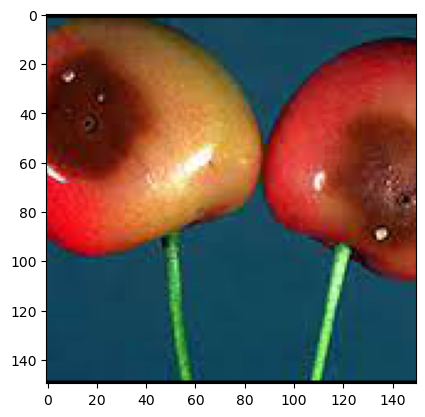

In [ ]:
# plt.imshow(X_valid_tf[3], cmap='gray')

## Train test split

In [ ]:


# # Training dataset
# train_ds = tf.keras.utils.image_dataset_from_directory(
#     TRAIN_DATA_DIR,
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size
# )

# Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DATA_DIR,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


In [148]:
# class_names = train_ds.class_names
# print(class_names)

In [149]:
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [150]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [151]:
num_classes = 10

model = tf.keras.Sequential([
  # tf.keras.layers.Rescaling(1./255),
  # tf.keras.layers.Resizing(img_height, img_width),
  tf.keras.layers.Conv2D(5, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(5, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(5, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(20, 3, activation='relu'),
  # tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(5, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  #tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [152]:
checkpoint_cb = ModelCheckpoint(
    filepath="best_model.keras",   # or 'best_model.h5'
    monitor="val_loss",            # what metric to monitor
    save_best_only=True,           # save only the best model
    save_weights_only=False,       # set True if you only want weights
    mode="min",                    # "min" for loss, "max" for accuracy
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor="val_loss",
    patience=10,           # number of epochs without improvement before stopping
    restore_best_weights=True,  # go back to best weights automatically
    verbose=1
)

In [153]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=200,
    callbacks=[checkpoint_cb, earlystop_cb]
)


Epoch 1/1500
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0939 - loss: 2.3012
Epoch 1: val_loss improved from inf to 2.27812, saving model to best_model.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.0941 - loss: 2.3010 - val_accuracy: 0.1096 - val_loss: 2.2781
Epoch 2/1500
65/68 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1293 - loss: 2.2656
Epoch 2: val_loss improved from 2.27812 to 2.11154, saving model to best_model.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1304 - loss: 2.2640 - val_accuracy: 0.1728 - val_loss: 2.1115
Epoch 3/1500
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2148 - loss: 2.0165
Epoch 3: val_loss improved from 2.11154 to 1.87880, saving model to best_model.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2155 - loss: 2.0152 - val_accuracy: 0.2508 - val_loss: 1.8788
Epoch 4/1500
64/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2800 - loss: 1.8349
Epoch 4: val_loss improved from 1.87880 to 1.81995, s

In [155]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)              │ (None, 148, 148, 5)    │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 74, 74, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 72, 72, 5)      │           230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 36, 36, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 34, 34, 5)      │           230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 17, 17, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 15, 15, 5)      │           230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 7, 7, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 245)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         2,460 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,872 (38.57 KB)

 Trainable params: 3,290 (12.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,582 (25.71 KB)

Findings:

1. The more conv layers and maxpooling the smaller the parameters
2. RGB improves performance by more than 10 points
3. Removing dense 128 halved parameters and boosted performance (60 acc, 45 or 50 val)
4. Smaller dense of 64 had best performance: 71 train and 52 val but increased the parameters to 28k
5. 46, 35: Removing blur and greyscaling